# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import tensorflow as tf

%matplotlib inline

In [2]:
dataset = get_dataset("/home/workspace/data/train/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 86
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [3]:
def display_images(batch):
    # TODO - Your implementation here
    colors = {
        1:"red", 
        2:"blue", 
        4:"green"}
    
    w, h, c = datapoint["image"].shape
    fig, ax = plt.subplots(figsize=(7,7))
    ax.imshow(datapoint["image"].numpy().astype("uint8"))
    groundtruth_classes = datapoint["groundtruth_classes"].numpy()
    
    for i in range(len(datapoint["groundtruth_boxes"])):
        ymin, xmin, ymax, xmax = datapoint["groundtruth_boxes"][i]
        ground_class = groundtruth_classes[i]
        rect = patches.Rectangle((xmin*w, ymin*h), (xmax-xmin)*w, (ymax-ymin)*h, 
                                    edgecolor=colors[ground_class], facecolor="none")
        ax.add_patch(rect)
        
    plt.show()

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

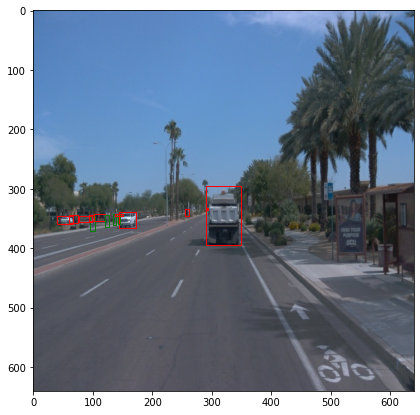

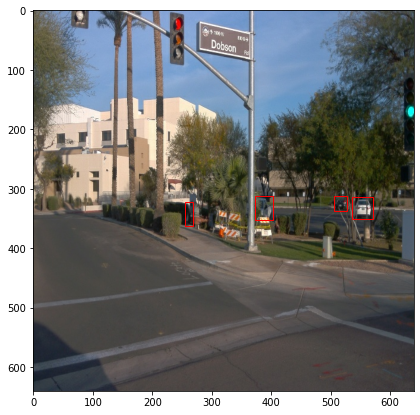

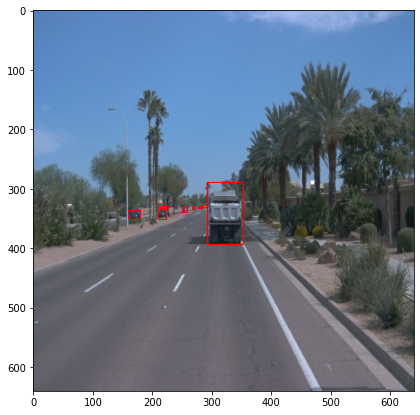

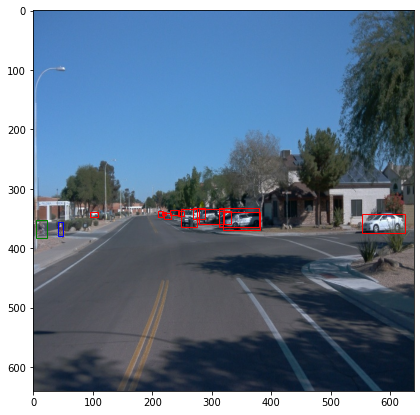

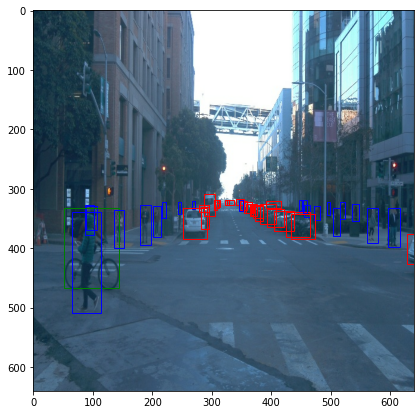

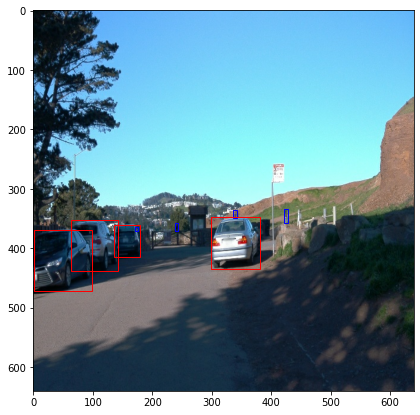

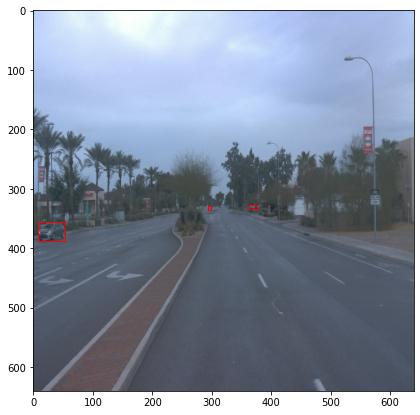

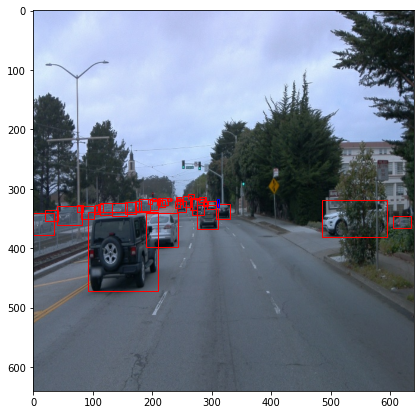

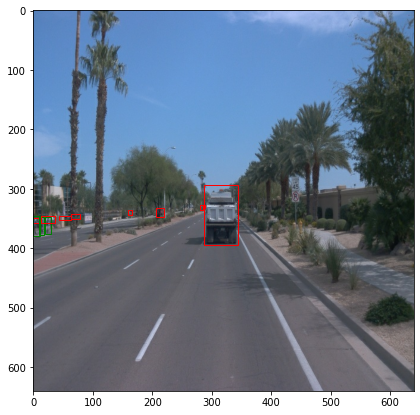

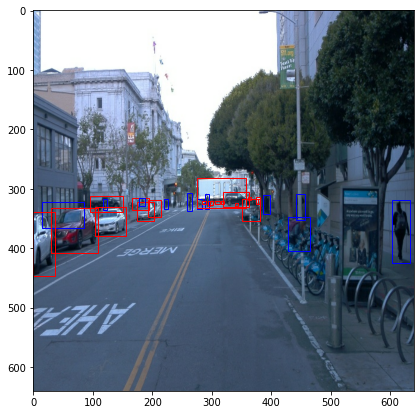

In [9]:
# Display 10 random images in dataset
for datapoint in dataset.shuffle(10).take(10):
    display_images(datapoint)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

### 1. Occurance Frequency For Each Class
This section investigate the occurance of each class in the training dataset

In [46]:
N = 1000 # Number of images to explore
obj_freq = {}

for images in dataset.take(N):        
    for _class in range(len(images["groundtruth_classes"])):
        
        class_label = images["groundtruth_classes"].numpy()
        
        # Check if the class label has already existed
        if class_label[_class] in obj_freq.keys():
            # Raise count by 1 for existing class label
            obj_freq[class_label[_class]] += 1
        else:
            # Otherwise, create a new class label in dictionary with key value 1
            obj_freq[class_label[_class]] = 1


Object frequency for each class: {1: 16792, 2: 5181, 4: 109}


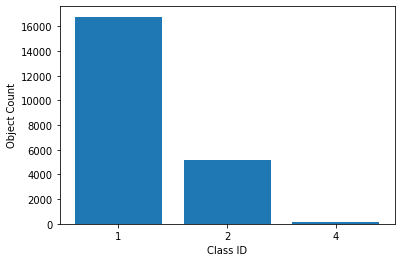

In [47]:
print(f"Object frequency for each class: {obj_freq}")

fig = plt.figure()
classes = [str(x) for x in obj_freq.keys()]
plt.bar(classes, obj_freq.values())
plt.xlabel("Class ID")
plt.ylabel("Object Count")
plt.show()

### 2. Object Distribution For Each Class
This section investigate the distribution of object counts for each class in the training dataset

In [48]:
obj_dist = {1:[], 2:[], 4:[]}

for images in dataset.take(N):   
    obj_dist[1].append(0)
    obj_dist[2].append(0)
    obj_dist[4].append(0)
    
    for _class in range(len(images["groundtruth_classes"])):
        
        class_label = images["groundtruth_classes"].numpy()
        obj_dist[class_label[_class]][-1] += 1

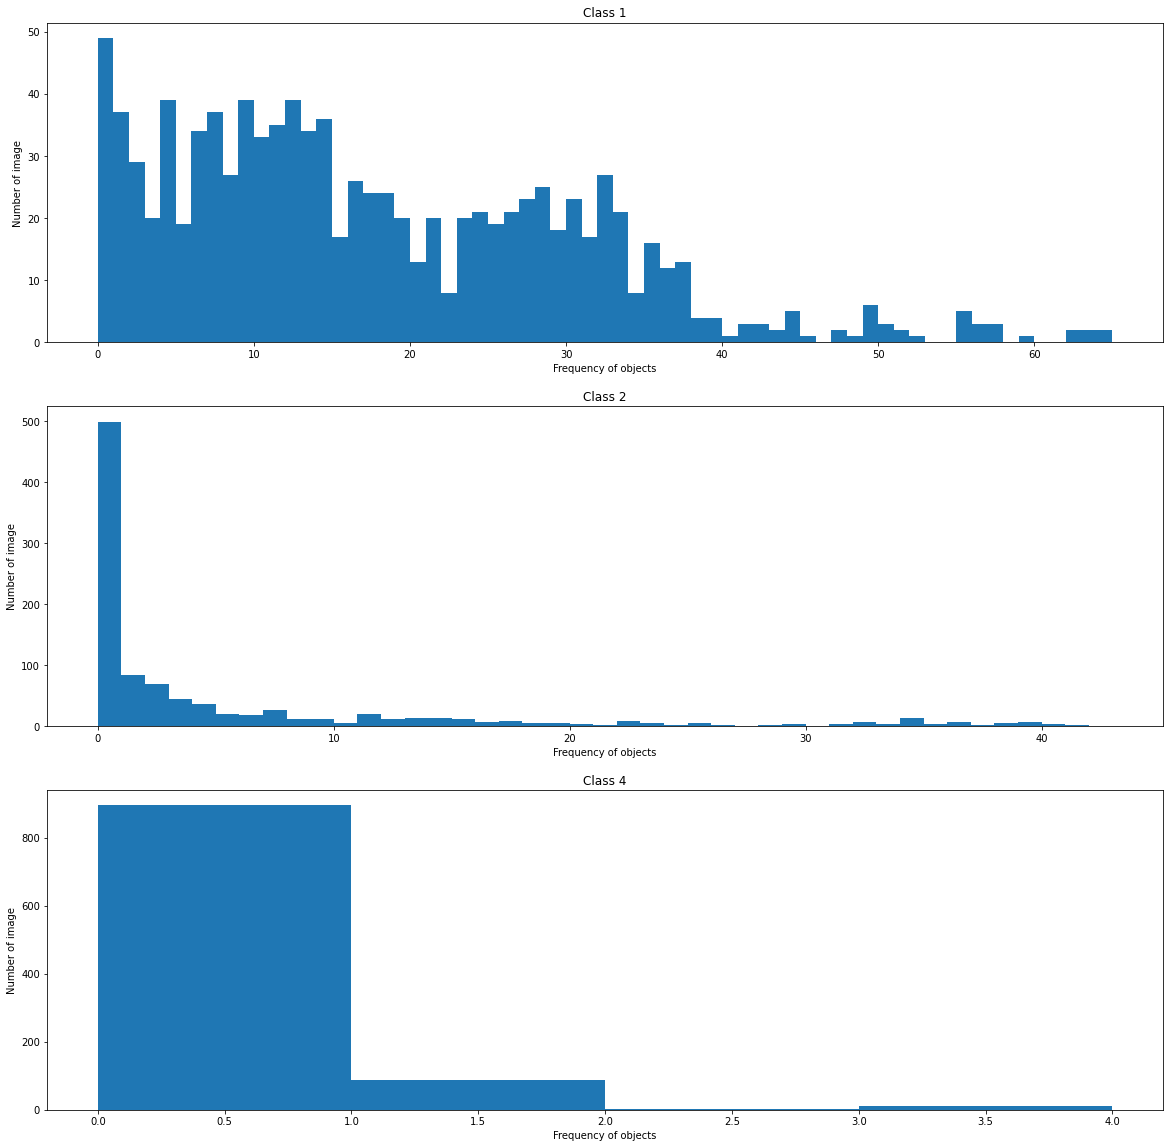

In [49]:
fig, ax = plt.subplots(3, 1, figsize=(20,20))

classes = list(obj_dist.keys())
for ci in range(len(obj_dist.keys())):
    class_ = classes[ci]
    ax[ci].hist(obj_dist[class_], bins=range(min(obj_dist[class_]), max(obj_dist[class_])))
    ax[ci].set_title("Class " + str(class_))
    
    ax[ci].set_ylabel("Number of image")
    ax[ci].set_xlabel("Frequency of objects")

plt.show()

### 3. Object Position For Each Class
This section investigate the distribution of object position for each class in the training dataset

In [54]:
positional_dist = {}  

for images in dataset.take(N):        
    for _class in range(len(images["groundtruth_classes"])):
        
        groundtruth_classes = images["groundtruth_classes"].numpy()
        groundtruth_boxes = images["groundtruth_boxes"].numpy()
    
        #Positional Stats
        ymin, xmin, ymax, xmax = groundtruth_boxes[_class]
        center_x, center_y = int((xmin+xmax)*10/2), int((ymin+ymax)*10/2)
        
        if groundtruth_classes[_class] not in positional_dist.keys():
            positional_dist[groundtruth_classes[_class]] = np.zeros((10,10,2))
            
        positional_dist[groundtruth_classes[_class]][center_y, center_x,0] += 1
        
        #Area
        positional_dist[groundtruth_classes[_class]][int(ymin*10):int(ymax*10)+1, int(xmin*10):int(xmax*10)+1,1] += 1

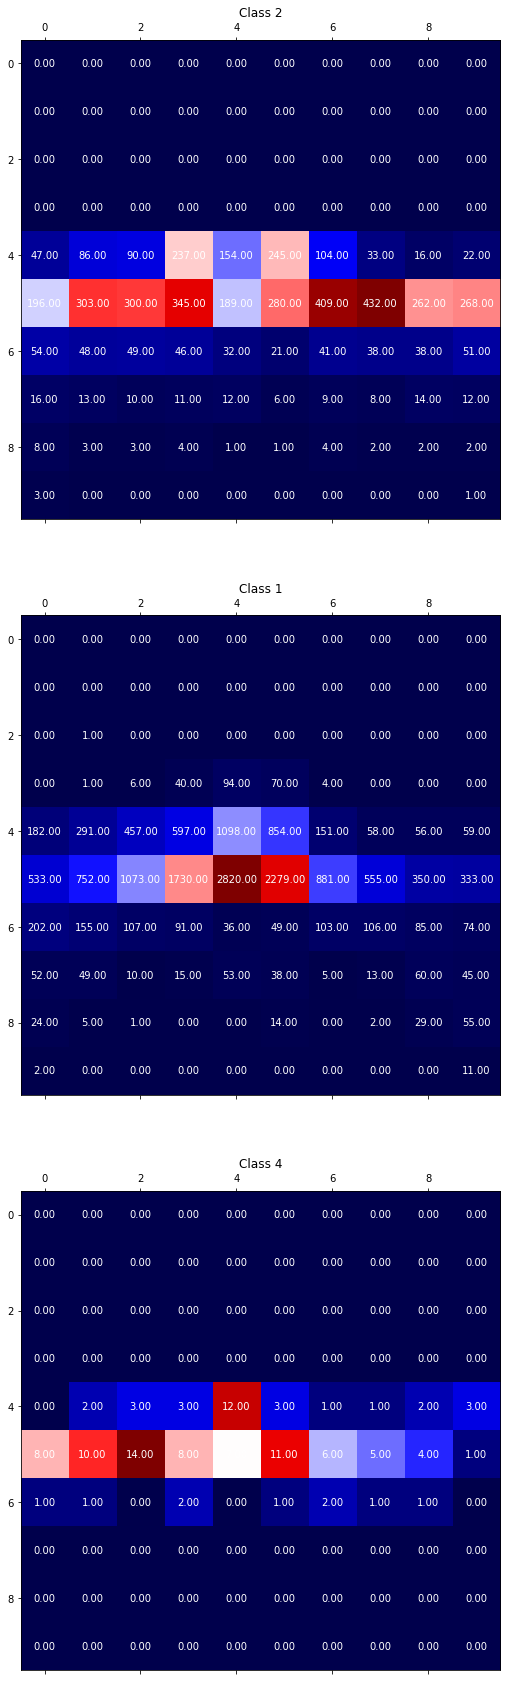

In [55]:
fig, ax = plt.subplots(3, 1, figsize=(30,30))

classes = class_count.keys()
for ci in range(len(class_count.keys())):
    class_ = list(class_count.keys())[ci]
    ax[ci].matshow(positional_dist[class_][:,:,0], cmap="seismic")

    s = positional_dist[class_][:,:,0].sum()
    for (i,j), value in np.ndenumerate(positional_dist[class_][:,:,0]):
        ax[ci].text(j, i, "{:0.2f}".format(value), ha="center", va="center", color="white")
        
    ax[ci].set_title("Class " + str(class_))

plt.show()